In [590]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
movies = pd.read_csv('movies.csv', encoding='latin-1')

In [591]:
#Renaming columns in a variable and then useing the .rename method to make the change

In [592]:
col_rename = {'name': 'title', 'gross': 'profit'} 

In [593]:
movies = movies.rename(columns=col_rename)

In [594]:
movies.head()

,budget,company,country,director,genre,profit,title,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [595]:
movies.set_index('title', inplace=True) #Set the index to the movie title

In [596]:
#Changing profit and budget to intergers so they can be graphed

In [597]:
movies['profit'].astype(int)
movies['budget'].astype(int)

title
Stand by Me                        8000000
Ferris Bueller's Day Off           6000000
Top Gun                           15000000
Aliens                            18500000
Flight of the Navigator            9000000
                                    ...   
Absolutely Fabulous: The Movie           0
Mothers and Daughters                    0
Batman: The Killing Joke           3500000
The Eyes of My Mother                    0
From the Land of the Moon                0
Name: budget, Length: 6820, dtype: int32

# I wanted to see the average movie time that was veiwed

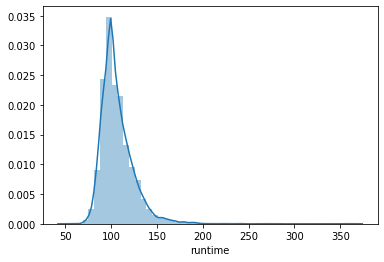

In [598]:
#Create a simple dist plot to look at the distribution of runtime. Most movies are around 100 minutes long

sns.distplot(movies['runtime'], kde=True)



# Making a table of genre counts in the dataframe using the crosstab function and then making a bar graph to show the number of occurences for each genre.  Comedy, Drama, and Action are in the top 3

In [599]:
genre_count = pd.crosstab(index=movies['genre'], columns='count')

In [600]:
genre_count

col_0,count
genre,
Action,1331
Adventure,392
Animation,277
Biography,359
Comedy,2080
Crime,522
Drama,1444
Family,14
Fantasy,32


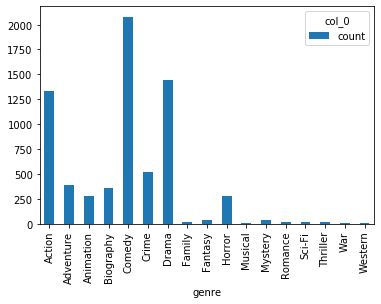

In [601]:
genre_count.plot(kind='bar')

In [602]:
#Creating new dataframe and sorting the profit and budget from highest to lowest

In [603]:
movies = movies[['genre', 'budget', 'profit', 'runtime', 'rating', 'company', 'director', 'year']]
movies.sort_values(by=['profit', 'budget'], ascending=False, inplace=True)

In [604]:
movies.head()

,genre,budget,profit,runtime,rating,company,director,year
title,,,,,,,,
Star Wars: The Force Awakens,Action,245000000.0,936662225.0,136,PG-13,Lucasfilm,J.J. Abrams,2015
Avatar,Action,237000000.0,760507625.0,162,PG-13,Twentieth Century Fox Film Corporation,James Cameron,2009
Titanic,Drama,200000000.0,658672302.0,194,PG-13,Twentieth Century Fox Film Corporation,James Cameron,1997
Jurassic World,Action,150000000.0,652270625.0,124,PG-13,Universal Pictures,Colin Trevorrow,2015
The Avengers,Action,220000000.0,623357910.0,143,PG-13,Marvel Studios,Joss Whedon,2012


In [605]:
#Grabbing the top 100 movies based on profit

In [624]:
Top_movies['genre'].value_counts()

Action       43
Adventure    25
Animation    20
Comedy        6
Drama         5
Biography     1
Name: genre, dtype: int64

In [607]:
#Checking the top movies and the money made

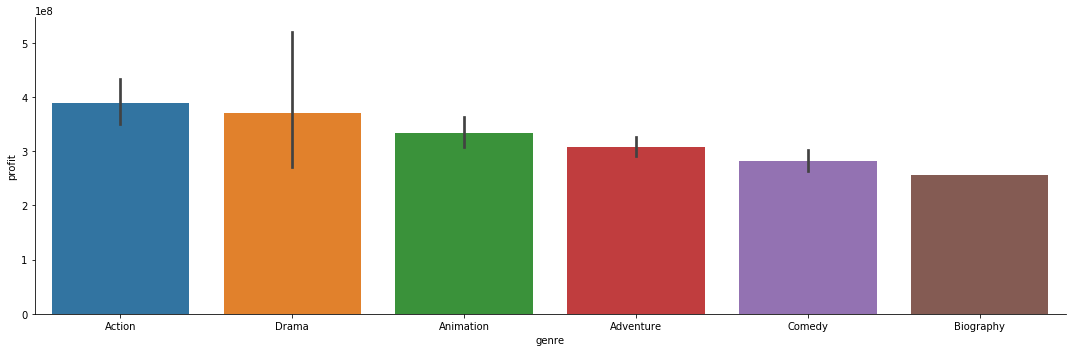

In [608]:
sns.catplot(x='genre', y='profit', data=Top_movies, kind='bar', aspect=3 )

In [609]:
#Checking money spent to make each movie

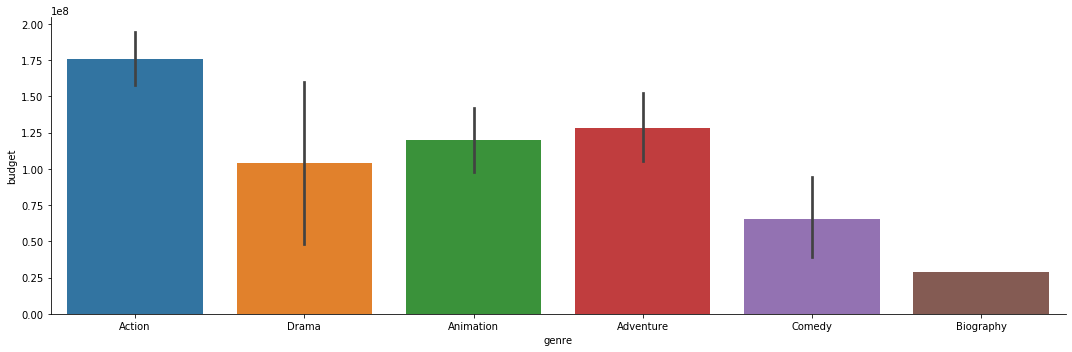

In [610]:
sns.catplot(x='genre', y='budget', data=Top_movies, kind='bar', aspect=3 )

In [611]:
#Filtering top 100 movies to top 5 movies and graphing those based on genre and profit

In [619]:
Top_5 = Top_movies.nlargest(5, columns='profit')

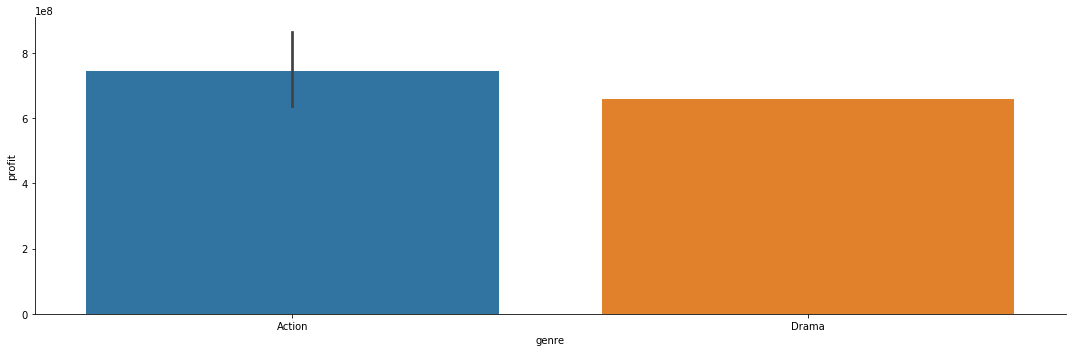

In [613]:
sns.catplot(x='genre', y='profit', data=Top_5, kind='bar', aspect=3 )

# I wanted to check if there was a relationship to the year the movie was made and the money spent on making it.

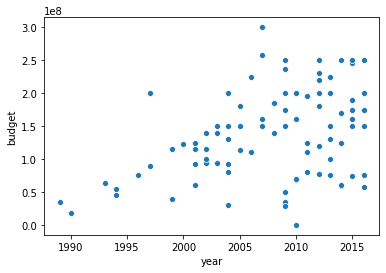

In [614]:
sns.scatterplot(x='year', y='budget', data=Top_movies)

# It looks like on average PG-13 movies do the best

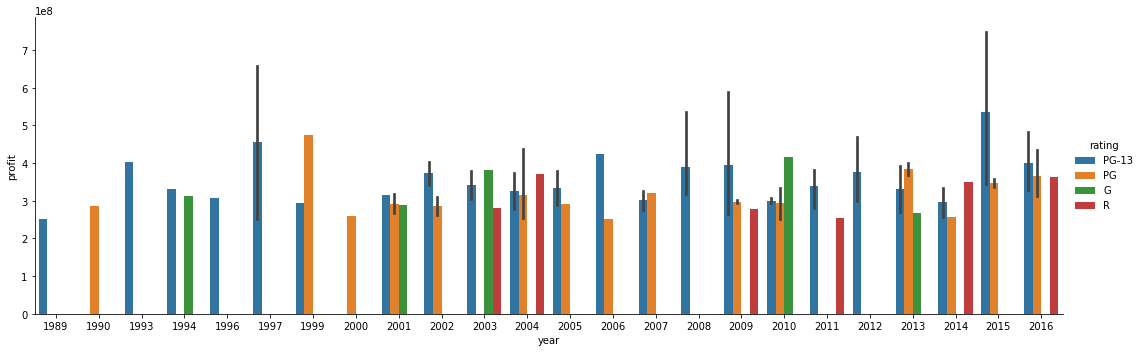

In [615]:
sns.catplot(x='year', y = 'profit', data=Top_movies, hue='rating', kind='bar', aspect=3)

# Lucasfilm made the most profit out of the top 5.

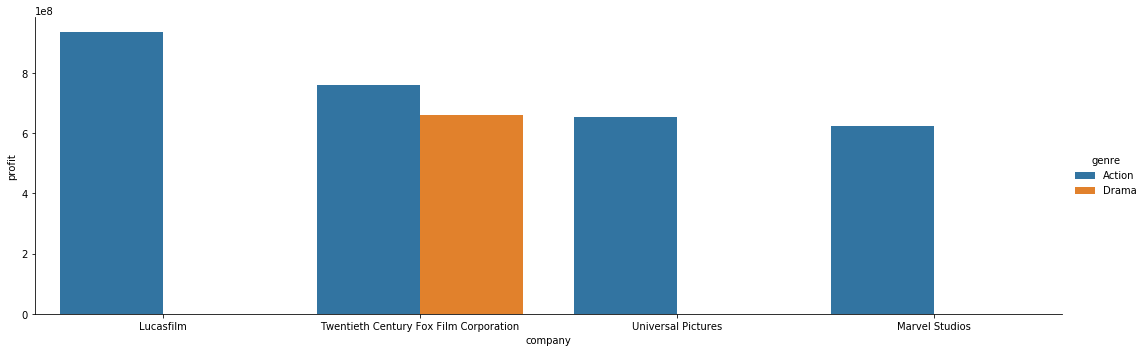

In [618]:
sns.catplot(x='company', y='profit', data=Top_5, hue='genre', kind='bar', aspect=3)